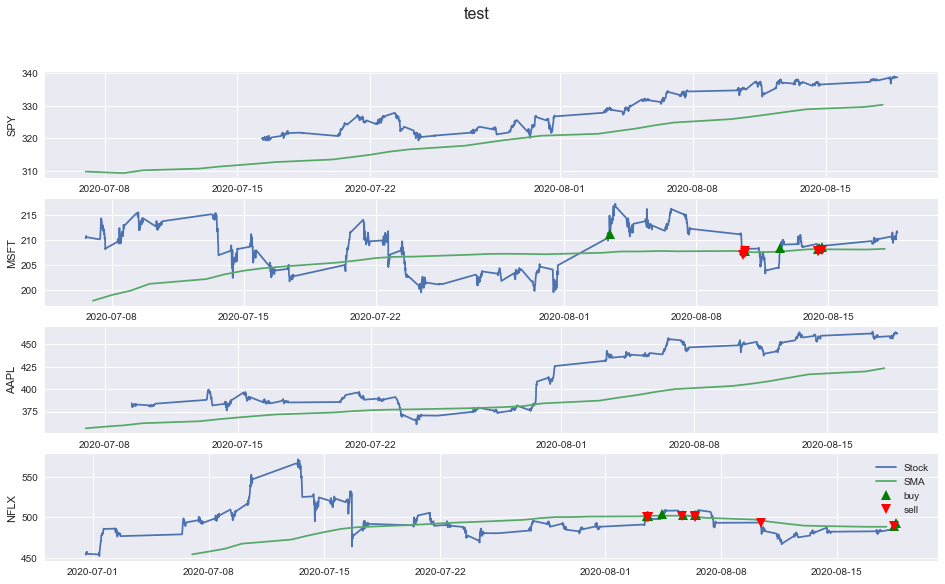

In [53]:
from datetime import datetime
import numpy as np
import alpaca_trade_api as tradeapi
import pandas as pd
import threading
from time import sleep 
import json
import logging
import matplotlib.pyplot as plt


APCA_API_KEY_ID = 'PKTVWYF8T2T1UEUJVA5T'
APCA_API_SECRET_KEY = '2euAseS6hCblaZQRAE0odvz3/zuLttrz85ba8vyr'
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'

api = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY, APCA_API_BASE_URL, api_version='v2')

activities=api.get_activities()

timeList = []
qtyList = []
symbolList = []
sideList = []
priceList = []

# Reads, formats and stores the new bars
for i in range(len(activities)):
    timeList.append(datetime.fromisoformat(str((activities[i].transaction_time))))
    #timeList.append(activities[i].transaction_time)
    symbolList.append(activities[i].symbol)
    sideList.append(activities[i].side)
    qtyList.append(activities[i].qty)
    priceList.append(activities[i].price)
buyssales = pd.DataFrame(list(zip(timeList,symbolList,sideList,priceList, qtyList)), 
               columns =['time','symbol','side','price', 'qty']) 
buyssales 
#####################################################################################
def MA(df, n):  #######Carson Created from https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code
    MA = pd.Series((df['close'].rolling(window=n).mean()), name = 'MA_' + str(n))  
    df = df.join(MA)  
    return df
##################################################################################### Get historical data and plot buys/sales
barTimeframe = "15Min" # 1Min, 5Min, 15Min, 1H, 1D
assetsToTrade = ["SPY","MSFT","AAPL","NFLX"]
numberdayssma = (datetime.utcnow() - datetime(2020,7,30)).days

plt.style.use('seaborn')
fig, ax = plt.subplots(len(assetsToTrade), 1, sharex=False, figsize=[16, 9]) #sharex to true makes subplots share x axis ticks
# stock lines

for symbol, x in zip(assetsToTrade,range(4)):
    dataset = api.get_barset(symbol,barTimeframe,limit=1000).df
    smadataset = api.get_barset(symbol,'day',limit=50).df
    SMA20df = MA(smadataset[symbol],20)
    #SMA20dffull = MA(smadataset[symbol],20)
    #SMA20df = SMA20df[-numberdayssma:]
    ax[x].plot(dataset.reset_index()['index'], dataset[symbol].close,label='Stock') 
    ax[x].plot(SMA20df.reset_index()['index'], SMA20df['MA_20'],label='SMA') 
    #plt.plot(dataset["ADP"].open, dataset["ADP"].close, ax=ax[0])
    ax[x].set_ylabel(symbol)
    buys=buyssales.loc[(buyssales['side'] == 'buy')&(buyssales['symbol']==symbol)]
    sells=buyssales.loc[(buyssales['side'] == 'sell')&(buyssales['symbol']==symbol)]
    ax[x].plot(buys.time, buys.price.astype(float), '^', markersize=10, color='g', label='buy')
    ax[x].plot(sells.time, sells.price.astype(float), 'v', markersize=10, color='r', label='sell')
    #ax[x].set_xlim([datetime.date(2020, 7, 30), datetime.date(2020, 8, 18)])
    



fig.suptitle("test", fontsize=16)

#plt.gcf().autofmt_xdate()
#plt.ylim(300,700)
plt.legend()
plt.show()



In [212]:

#change datasource from alpaca to something else if i can find minute data. Or if I can have something run each day to pull
#data from alpaca and compile it

nan

In [24]:
buyssales.loc[buyssales['symbol'] == 'NFLX']

,time,symbol,side,price,qty
2,2020-08-18 15:31:22.456986+00:00,NFLX,sell,488.88,10
3,2020-08-18 15:10:51.767356+00:00,NFLX,buy,489.71,11
65,2020-08-10 13:30:54.301990+00:00,NFLX,sell,493.09,13
75,2020-08-06 15:11:21.411012+00:00,NFLX,buy,502.74,13
77,2020-08-06 14:41:05.791807+00:00,NFLX,sell,501.21,13
79,2020-08-06 14:00:43.455383+00:00,NFLX,buy,503.15,13
80,2020-08-06 13:40:30.842464+00:00,NFLX,sell,501.25,10
82,2020-08-05 19:54:16.064524+00:00,NFLX,buy,502.83,10
83,2020-08-05 19:44:08.522254+00:00,NFLX,sell,501.75,10
84,2020-08-04 13:40:26.768305+00:00,NFLX,buy,503.94,10


In [26]:
activities

[AccountActivity({   'activity_type': 'FILL',
     'cum_qty': '41',
     'id': '20200818120200705::55eeba43-0daf-4376-955f-dc3587cc86dc',
     'leaves_qty': '0',
     'order_id': '6fde55ec-633d-428a-9a7d-5e3962ce76fe',
     'price': '139.96',
     'qty': '41',
     'side': 'sell',
     'symbol': 'ADP',
     'transaction_time': '2020-08-18T16:02:00.705256Z',
     'type': 'fill'}),
 AccountActivity({   'activity_type': 'FILL',
     'cum_qty': '42',
     'id': '20200818115154301::a310ee56-4177-4d38-9924-a432a99b4dcd',
     'leaves_qty': '0',
     'order_id': '8e4036b2-b64c-4cc8-93f1-b066afbe4bf7',
     'price': '139.88',
     'qty': '42',
     'side': 'buy',
     'symbol': 'ADP',
     'transaction_time': '2020-08-18T15:51:54.301678Z',
     'type': 'fill'}),
 AccountActivity({   'activity_type': 'FILL',
     'cum_qty': '10',
     'id': '20200818113122456::e183d05e-5100-4ded-b8ed-5637f08d8622',
     'leaves_qty': '0',
     'order_id': '7f1ed516-ca9d-4b9b-9502-424026498875',
     'price': '4

In [50]:
SMA20df[-numberdayssma:]

,open,high,low,close,volume,MA_20
2020-07-22 00:00:00-04:00,492.1900,497.2000,487.2000,489.63,6226091,492.6720
2020-07-23 00:00:00-04:00,491.1300,491.9000,474.7700,477.69,4473567,493.6740
2020-07-24 00:00:00-04:00,468.7700,487.1700,467.5400,480.45,7488414,494.3895
2020-07-27 00:00:00-04:00,484.5100,496.9200,482.3100,495.70,7363295,497.0050
2020-07-28 00:00:00-04:00,496.0200,497.7927,487.7601,488.45,5481319,499.0565
2020-07-29 00:00:00-04:00,492.2500,494.9200,484.1300,484.48,5853532,500.5430
2020-07-30 00:00:00-04:00,480.7072,488.3500,477.5101,485.69,6058624,500.5485
2020-07-31 00:00:00-04:00,488.2900,494.8000,484.5000,489.27,5370995,501.1510
2020-08-03 00:00:00-04:00,490.8600,503.0900,490.2300,498.62,3955162,501.3915
2020-08-04 00:00:00-04:00,498.6500,510.4436,498.6500,509.87,5110171,502.2325
